## 269. Alien Dictionary

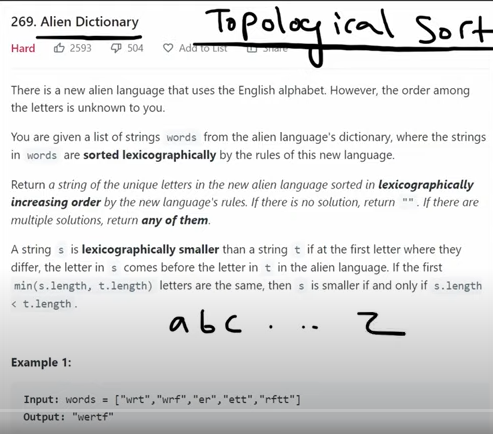

### method: adjacency list and post order dfs

- what is union find: https://www.youtube.com/watch?v=6kTZYvNNyps

In [31]:
class Solution:
    def alienOrder(self, words):
        # adjacency list used set for avoid duplicates
        adj = {c: set() for w in words for c in w}
        
        for i in range(len(words) - 1):
            w1, w2 = words[i], words[i + 1]
            minLen = min(len(w1), len(w2))
            if len(w1) > len(w2) and w1[:minLen] == w2[:minLen]: # not possible
                return ''
            for j in range(minLen):
                if w1[j] != w2[j]:
                    adj[w1[j]].add(w2[j])
                    break
        print('adj is: ', adj)
        visit = {} # False visited, true visited and in current path
        res = []
        def dfs(c): # visited is different from in curr path
            print('visit', visit)
            if c in visit:
                return visit[c]
            visit[c] = True
            for nei in adj[c]:
                if dfs(nei):
                    return True # loops
            visit[c] = False # set back
            res.append(c)
            print('res', res)

        for c in adj:
            if dfs(c):
                return ''
        res.reverse()
        return ''.join(res)
# current path means loop detected, visited means only visited the point

- the idea is to build an adjacency list to represent graph, and then check loop using dfs, if no loop, return True

In [32]:
s = Solution()
words = ['wrt', 'wrf', 'er', 'ett', 'rftt']
s.alienOrder(words)


adj is:  {'w': {'e'}, 'r': {'t'}, 't': {'f'}, 'f': set(), 'e': {'r'}}
visit {}
visit {'w': True}
visit {'w': True, 'e': True}
visit {'w': True, 'e': True, 'r': True}
visit {'w': True, 'e': True, 'r': True, 't': True}
res ['f']
res ['f', 't']
res ['f', 't', 'r']
res ['f', 't', 'r', 'e']
res ['f', 't', 'r', 'e', 'w']
visit {'w': False, 'e': False, 'r': False, 't': False, 'f': False}
visit {'w': False, 'e': False, 'r': False, 't': False, 'f': False}
visit {'w': False, 'e': False, 'r': False, 't': False, 'f': False}
visit {'w': False, 'e': False, 'r': False, 't': False, 'f': False}


'wertf'

In [4]:
words = ['abc', 'bcd', 'ef']
adj = {c: set() for w in words for c in w}
adj

{'a': set(), 'b': set(), 'c': set(), 'd': set(), 'e': set(), 'f': set()}

- alien order is based on define, and we need graph to solve